# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
experiment = pd.read_excel("Table_1_experimental_clonal_size.xlsx")

In [3]:
experiment.head()

,Barcode,(1)719 Ipsi,(1)719 Contra,"(1,1V)719 Ipsi","(1,1V)719 Contra","(1,2V)719 Ipsi","(1,2V)719 Contra","(1,3V)719 Ipsi","(1,3V)719 Contra","(1,1T)719 Ipsi",...,"(1,1T,1V)719 Ipsi","(1,1T,1V)719 Contra","(1,1T,2V)719 Ipsi","(1,1T,2V)719 Contra","(1,1T,1T)719 Ipsi","(1,1T,1T)719 Contra","(1,1T,2T)719 Ipsi","(1,1T,2T)719 Contra","(1,1T,3T)719 Ipsi","(1,1T,3T)719 Contra"
0,AAATCAAGATCGAAACTGGTCAAACTG,0.001608,0.000614,0.002460,0.002479,0.002866,0.001103,0.004939,0.006328,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.005538,0.0,0.0,0.003078
1,AAATCAGGATGCAAACAGGTGTAACGG,0.001913,0.002575,0.003878,0.004407,0.003090,0.003762,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,AAATCCAGATCGAAATGGGTTTAACTT,0.002520,0.000000,0.005109,0.003288,0.005141,0.000000,0.002147,0.002167,0.00199,...,0.000000,0.0,0.003741,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,AAATCCAGATGGAAAGAGGTAGAACCC,0.001200,0.000743,0.001532,0.001386,0.002106,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,AAATCTCGATGGAAATCGGTCAAACAA,0.002975,0.001134,0.004104,0.002142,0.009155,0.001001,0.009424,0.010710,0.00199,...,0.002222,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [4]:
np.shape(experiment)

(2070, 39)

In [5]:
passage = experiment.columns

In [6]:
passage[1:]

Index(['(1)719 Ipsi', '(1)719 Contra', '(1,1V)719 Ipsi', '(1,1V)719 Contra',
       '(1,2V)719 Ipsi', '(1,2V)719 Contra', '(1,3V)719 Ipsi',
       '(1,3V)719 Contra', '(1,1T)719 Ipsi', '(1,1T)719 Contra',
       '(1,2T)719 Ipsi', '(1,2T)719 Contra', '(1C,1)719 Ipsi',
       '(1C,1)719 Contra', '(1C,2)719 Ipsi', '(1C,2)719 Contra',
       '(1,2V,1)719 Ipsi', '(1,2V,1)719 Contra', '(1,2V,2)719 Ipsi',
       '(1,2V,2)719 Contra', '(1,2V,3)719 Ipsi', '(1,2V,3)719 Contra',
       '(1,3V,1V)719 Ipsi', '(1,3V,1V)719 Contra', '(1,3V,2V)719 Ipsi',
       '(1,3V,2V)719 Contra', '(1,3V,1T)719 Ipsi', '(1,3V,1T)719 Contra',
       '(1,1T,1V)719 Ipsi', '(1,1T,1V)719 Contra', '(1,1T,2V)719 Ipsi',
       '(1,1T,2V)719 Contra', '(1,1T,1T)719 Ipsi', '(1,1T,1T)719 Contra',
       '(1,1T,2T)719 Ipsi', '(1,1T,2T)719 Contra', '(1,1T,3T)719 Ipsi',
       '(1,1T,3T)719 Contra'],
      dtype='object')

In [7]:
primary = np.vstack([experiment["(1)719 Ipsi"], experiment["(1)719 Contra"]])
secondary = np.vstack([
#     experiment["(1,1V)719 Ipsi"], experiment["(1,1V)719 Contra"],
                       experiment["(1,2V)719 Ipsi"], experiment["(1,2V)719 Contra"],
#                        experiment["(1,3V)719 Ipsi"], experiment["(1,3V)719 Contra"],
#                        experiment["(1,1T)719 Ipsi"], experiment["(1,1T)719 Contra"],
#                        experiment["(1,2T)719 Ipsi"], experiment["(1,2T)719 Contra"],
#                        experiment["(1C,1)719 Ipsi"], experiment["(1C,1)719 Contra"],
#                        experiment["(1C,2)719 Ipsi"], experiment["(1C,2)719 Contra"]
                      ])
tertiary = np.vstack([experiment["(1,2V,1)719 Ipsi"], experiment["(1,2V,1)719 Contra"]
#                       ,experiment["(1,2V,2)719 Ipsi"], experiment["(1,2V,2)719 Contra"],
#                       experiment["(1,2V,3)719 Ipsi"], experiment["(1,2V,3)719 Contra"],
#                       experiment["(1,3V,1V)719 Ipsi"], experiment["(1,3V,1V)719 Contra"],
#                       experiment["(1,3V,2V)719 Ipsi"], experiment["(1,3V,2V)719 Contra"],
#                       experiment["(1,3V,1T)719 Ipsi"], experiment["(1,3V,1T)719 Contra"],
#                       experiment["(1,1T,1V)719 Ipsi"], experiment["(1,1T,1V)719 Contra"],
#                       experiment["(1,1T,2V)719 Ipsi"], experiment["(1,1T,2V)719 Contra"],
#                       experiment["(1,1T,1T)719 Ipsi"], experiment["(1,1T,1T)719 Contra"],
#                       experiment["(1,1T,2T)719 Ipsi"], experiment["(1,1T,2T)719 Contra"],
#                       experiment["(1,1T,3T)719 Ipsi"], experiment["(1,1T,3T)719 Contra"]
                     ])


# Clone size correlation cross passage

In [8]:
# c12 = np.zeros([len(primary), len(secondary)])
# for p in range(len(primary)):
#     for s in range(len(secondary)):
#         c12[p][s],_ = pearsonr(primary[p], secondary[s])

# c13 = np.zeros([len(primary), len(tertiary)])
# for p in range(len(primary)):
#     for t in range(len(tertiary)):
#         c13[p][t],_ = pearsonr(primary[p], tertiary[t])
        
# c23 = np.zeros([len(secondary), len(tertiary)])
# for s in range(len(secondary)):
#     for t in range(len(tertiary)):
#         c23[s][t],_ = pearsonr(secondary[s], tertiary[t])

# C12 = np.asarray(c12).reshape(-1)
# C13 = np.asarray(c13).reshape(-1)
# C23 = np.asarray(c23).reshape(-1)

# data = pd.DataFrame({"passage": 
#                      np.append(np.append(
#                          np.repeat("c12",len(C12)),
#                                                     np.repeat("c13",len(C13))),
#                                           np.repeat("c23",len(C23))),
#                      "correlation": 
#                      np.append(np.append(
#                          C12,
#                                                         C13),
#                                               C23)
#                     })

# sim = pd.DataFrame({"passage":["c12", "c13", "c23"],
#                    "correlation":[0.615, 0.468, 0.83]})

In [9]:
# sns.violinplot(x="passage",y="correlation",data=data)
# sns.pointplot(x="passage",y="correlation",data=sim,color="yellow")

# Barcode survival probability

In [10]:
def barcodeToCloneSize(barcodeFrequency, totalCellNumber):
    cloneSize = barcodeFrequency * totalCellNumber
    return(cloneSize)

def survival(cloneSize, n0, fraction, cellNumber):
    index = np.where(cloneSize > n0*fraction)
    survival = len(index[0])/cellNumber
    return(survival*100)


(array([1511.,  320.,  126.,   56.,   24.,   13.,   11.,    4.,    2.,
           3.]),
 array([  0.    ,  74.3125, 148.625 , 222.9375, 297.25  , 371.5625,
        445.875 , 520.1875, 594.5   , 668.8125, 743.125 ]),
 <a list of 10 Patch objects>)

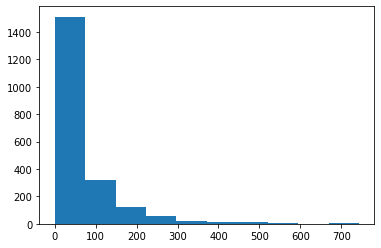

In [21]:
plt.hist(primary[0]*cellNumber[0])

In [26]:
cloneSize = primary[0]*cellNumber[0]
min(cloneSize[cloneSize>0])

22.15

In [24]:
np.median(primary[0]*cellNumber[0])

35.6875

In [12]:
primaryBarcode = primary
secondaryBarcode = secondary
tertiaryBarcode = tertiary
cellNumber = np.array([125000, 300000, 300000])

primaryCloneSize = barcodeToCloneSize(primaryBarcode, cellNumber[0]*40)
secondaryCloneSize = barcodeToCloneSize(secondaryBarcode, cellNumber[1]*18)
tertiaryCloneSize = barcodeToCloneSize(tertiaryBarcode, cellNumber[2]*42)

t = np.array([79,68,55])
proDivRate = 1.0
n0 = proDivRate*t/2

surv = pd.DataFrame({"passage": 
                     np.append(np.append(
                         np.repeat("primary",len(primaryCloneSize)),
                         np.repeat("secondary",len(secondaryCloneSize))),
                               np.repeat("tertiary",len(tertiaryCloneSize))),
                     "survival (%)": 
                     np.append(np.append(
                         [survival(p, n0[0], 0.5, cellNumber[0]) for p in primaryCloneSize],
                         [survival(s, n0[1], 0.5, cellNumber[1]) for s in secondaryCloneSize]),
                               [survival(t, n0[2], 0.5, cellNumber[2]) for t in tertiaryCloneSize])
                    })

In [13]:
surv

,passage,survival (%)
0,primary,0.981600
1,primary,0.624000
2,secondary,0.155667
3,secondary,0.113000
4,tertiary,0.117667
5,tertiary,0.105333


In [14]:
simSurv = pd.DataFrame({"passage":["primary", "secondary", "tertiary"],
                   "survival (%)":[0.176, 0.122, 0.097]})

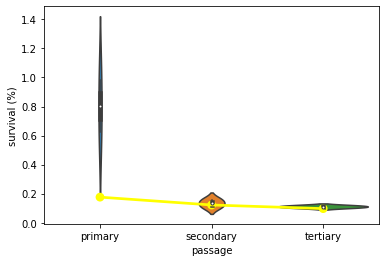

In [15]:
survPlot=sns.violinplot(x="passage",y="survival (%)",data=surv)
sns.pointplot(x="passage",y="survival (%)",data=simSurv,color="yellow")
# survPlot.set(ylim=(0,0.1))

# First incomplete moment

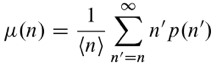

In [16]:
Image("FIM.png")

In [17]:
def firstIncompleteMoment(cloneSizes):
    cloneSizes = np.array(cloneSizes)
    averageCloneSize = np.mean(cloneSizes)
    cloneSizeRange = np.unique(cloneSizes)
    freq = np.array([(list(cloneSizes).count(i)/len(cloneSizes)) for i in cloneSizeRange])
    cloneProb = np.array([(size*prob) for (size, prob) in zip(cloneSizeRange, freq)])
    mu = np.zeros(len(cloneProb))
    for i in range(len(cloneProb)):
        mu[i]= sum(cloneProb[i:])/averageCloneSize
    return(mu)

def logPlot(X,y):
    Y = np.log(y)
    plt.plot(X,Y,'b')
    plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(X),'r')
    plt.xlabel('clone size')
    plt.ylabel('log first incomplete moment')

def firstIncompleteMomentLogPlot():
    for p in primary:
        pRange = np.unique(p)
        pMu = firstIncompleteMoment(p)
        plt.plot(pRange, pMu, "black")
    for s in secondary:
        sRange = np.unique(s)
        sMu = firstIncompleteMoment(s)
        plt.plot(sRange, sMu, "red")
    for t in tertiary:
        tRange = np.unique(t)
        tMu = firstIncompleteMoment(t)
        plt.plot(tRange, tMu, "darkturquoise")    
    plt.xlabel('clone size')
    plt.ylabel('log first incomplete moment')
    plt.yscale('log')

# firstIncompleteMomentLogPlot()

In [18]:
# logPlot(primaryRange,primaryMu)

In [19]:
# logPlot(secondaryRange,secondaryMu)

In [20]:
# logPlot(tertiaryRange,tertiaryMu)